In [1]:
%load_ext jupyter_ai_magics

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Assessing a model

In data science, a model is a set of assumptions about data. Often, models include assumptions about chance processes used to generate data (and may specify the details of a chance process). How does that help (you may be thinking)? It helps because that way, models can simplify complexity and understanding the assumed processes can also help us make predictions. For example, if you are modeling the number of calls received at a call center/customer service line per hour, you may assume that the mean rate of calls is 10 per hour. 

It is a simplified representation of a real-world phenomenon or a process that is used to gain insights from data. As a data scientist, you will have to evaluate the quality of a model and determine if its good or bad. In this lecture, we will explore some simple examples illustrating the process of making such a determination.

In this course, we'll mostly work with models around how data is generated or drawn or assumptions about your data. Later on, you will also get the chance to learn about more complicated models.

### Let's get started!

Suppose your friend claims to have a fair die. What do we mean by fair? We mean that all numbers (1–6) are equally likely to come up. But after rolling the die 100 times, you noticed that the number 6 came up 28 times, which seems a lot more than expected.You start suspecting that the die might be biased towards landing on `6`. How can you decide if the die is fair? We now know how to mimic physical experiments! We can simulate what would happen if the die really were fair and see how unusual it is to get 28 sixes out of 100 rolls.

Other examples include analyzing whether Black people were systematically excluded from juries in Talladega County by looking at whether the panel was selected at random and ended up with a small number of Black panelists just due to chance. Suggested Reading: https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html. 

All you need to do is apply the concepts you learned in the previous lecture!


1. **Simulation**

    To test the fairness of the die, you decide to conduct a simulation. You roll the die 100 times and record the results. Or, in other words, you simulate one value of the statistic (in this case, for example, it can be the number of times/proportion the die lands on 6 out of 100 rolls). We can also use `sample_proportions` to simulate one value of the statistic. This is from the datascience module and is similar to np.random https://www.data8.org/datascience/util.html#datascience.util.sample_proportions.

[Optional] In case you're wondering, `sample_proportions` also generates random numbers under the hood to simulate outcomes (much like numpy's random methods!). It uses a random sampling process to decide how many of the sample_size outcomes correspond to each category based on the specified probabilities. Its output is designed to represent proportions.

In [4]:
# Return the proportion of random draws for each outcome in a distribution in the form of an array with the same length as probability that sums to 1
# Two arguments: 
# sample_size: The size of the sample to draw from the distribution.
# probabilities: An array of probabilities that forms a distribution.
# Returns: An array with the same length as probability that sums to 1.
sample_size = 100
probs_of_fair_die = make_array(1/6, 5/6)

sample_proportions(sample_size, probs_of_fair_die)

array([ 0.18,  0.82])

2. **Chosen Statistic**

    In case it was not clear from the previous block, the count in each category is the sample size times the corresponding proportion. So we can just as easily simulate counts instead of proportions! So number of times the die lands on `6` out of 100 is `18` from the previous cell! For better understanding, let's define a function that simulates the die roll and gives us the count. We can then repeat this 20000 times just like in the previous notebook! You can consider this our random selection model!

In [17]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, probs_of_fair_die).item(0)

die_rolls = make_array()
repetitions = 20000
for i in np.arange(repetitions):
    die_rolls = np.append(die_rolls, one_simulated_count())

3. **Expectation**

    If the die is truly fair, you would expect it to land on 6 around 17% of the time in the 100 tosses (Why?). But to assess this statement you will need to visualise the results of your simulation. *An empirical histogram would help!*



In [12]:
min(die_rolls), max(die_rolls)

(4.0, 34.0)

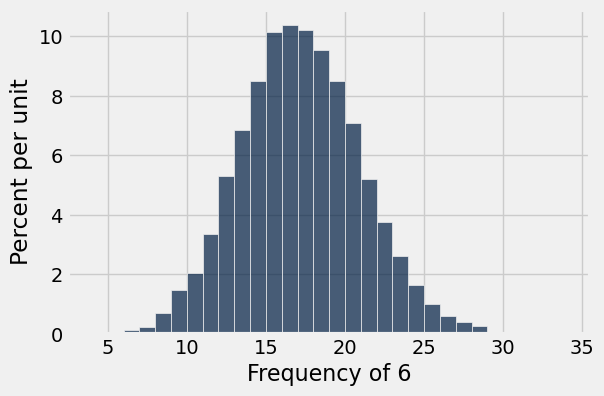

In [13]:
bins = np.arange(4, 35, 1)

# Create the histogram
histogram = Table().with_column('Frequency of 6', die_rolls).hist(bins=bins)

4. **Evaluation**

    After conducting the experiment, you can compare the actual frequency of 6 to the expected number. If the actual number deviates significantly from 16%~17%, it may indicate a bias in the die!

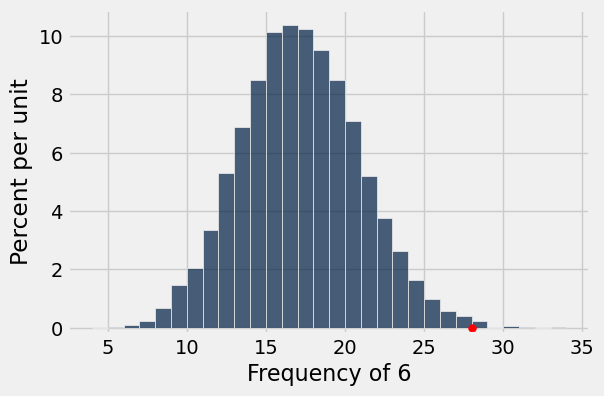

In [16]:
Table().with_column(
    'Frequency of 6', die_rolls
).hist(bins = bins)
plots.ylim(-0.002)
plots.scatter(28, 0, color='red', s=30);

We know from earlier that after rolling the die from our friend a 100 times, it landed on `6` 28 times. The histogram of simulated rolls is redrawn above with value the 28 shown as a red dot on the horizontal axis. The dot is very far out in the right hand tail of the histogram. Very few of the 20,000 repetitions (of rolling a die 100 times) simulated by the random model came out to be 28 or more. Therefore, it would be safe to conclude that the die is indeed not fair!

# Decisions and Uncertainty

Now, this worked well for a toy example. What do you do when you're analyzing data, and you're essentially thinking:
"Is what I'm seeing just random, or is something real going on?"

The methods that we used earlier to assess whether the die was fair or not, fall into a general framework of decision making called *statistical tests of hypotheses*.
Generally speaking, what statistical tests are trying to do is choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called **hypotheses**! There are two types of hypotheses: null and alternative.

Why two hypotheses? It's like a courtroom analogy: The null hypothesis is like "innocent until proven guilty". The alternative hypothesis is the claim of guilt. You need strong evidence (data) to reject the null hypothesis in favor of the alternative.

[Optional] Before we dig in, ever heard of any performance metrics (e.g., accuracy)? Why do hypotheses matter/can't we just use metrics? Hypothesis testing provides a structured way to evaluate claims about a population or process. Examples - Is a new drug more effective than a placebo? Is a coin biased? Does a model predict better than random guessing? It allows us to quantify uncertainty (by incorporating probability that provides evidence for whether something is true or whether observed data is consistent with a claim - this cannot be typically addressed by metrics like accuracy). Many real-world decisions depend on binary outcomes such as accepting or rejecting a claim, approving or disapproving a new policy, and this framework supports that. Some key differences to note are that performance metrics like accuracy assume that the data distribution is fixed and they're typically evaluated on a certain dataset (unlike hypothesis testing which involves variability due to sampling). Hypothesis testing provides a probabilistic foundation for evaluating claims whereas performance metrics are essential for practical model evaluation in machine learning and typically focus on maximizing utility of models. The hypotheses framework can overlap with metrics, for example, you might use hypothesis testing to determine if one model’s accuracy is significantly better than another’s or testing if a model performs better than random guessing, which is often a baseline for evaluating a model! Both approaches complement each other and form integral components of data analysis.

Let's understand this further:

1. **The null hypothesis** acts as a sort of "status quo" or "no effect" statement. Its the default or starting assumption. It says that nothing unusual or unexpected is happening, and any differences we see in the data are just due to random chance. For example, if you roll a die, the null hypothesis might be: The die is fair (each number has an equal chance of 1/6). The word “null” reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to nothing but chance. From a practical perspective, the null hypothesis is a hypothesis under which you can simulate data. Under this hypothesis, we can simulate random samples by using say `sample_proportions`.

It serves as the default or baseline assumption that there is no significant effect, relationship, or difference in the population parameters being studied. In simpler terms, the null hypothesis (often denoted as **H0**) represents the idea that any observed differences or patterns in your data are purely due to random chance or sampling variability. For example, if you are comparing the mean scores of two groups, the null hypothesis might state that there is no significant difference in the means of the two groups.


    
2. **The alternative hypothesis** In the context of data science, it is a statement that contradicts the null hypothesis. It is the opposite of the null hypothesis. It says that there is something unusual or unexpected going on—there’s a real effect or difference. It’s the hypothesis we’re trying to find evidence for! In other words, this says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis. For example, if you roll a die, the alternative hypothesis might be: The die is not fair (it is biased/the chances of each number are not equal).

It represents the researcher's specific claim or expectation about the population parameters being studied. Unlike the null hypothesis, the alternative hypothesis (often denoted as **H1**) asserts that there is a significant effect, relationship, or difference in the data. In simpler terms, the alternative hypothesis is what researchers are trying to find evidence for. For example, if you are conducting a study comparing the mean scores of two groups, the null hypothesis might state that there is no significant difference in the means, while the alternative hypothesis would assert that there is a specific difference in the means.


Let's work with some examples using the university rankings data to further understand this!

In [3]:
university_rankings = Table().read_table("data/world_university_rankings.csv")
university_rankings 

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


Let's say you propose the following model that predicts something about American universities: For an American university, there is a 68% chance that it has an overall score that is higher than the average overall score of all the universities. Now, you want to check if this claim matches reality by testing it with data! 

To test your claim, you set up two competing ideas: Let's define our *null* and *alternative* hypotheses. The *null hypothesis* states that the assumptions of your model are good. In other words, an American university does really have a 68% chance of having an overall score that is higher than the average of all the universities.
The *alternative hypothesis* simply states that the assumptions of your model are not correct, i.e., an American university does **not** have a 68% chance of having an overall score that is higher than the average of all the universities. Simple, right?

We will use our data to perform a test of hypotheses and see if our model looks good.

In [35]:
%%ai openai-chat:gpt-3.5-turbo
I have a sorted table of university rankings which is a Table object from the datascience python module. It has the date of the rank, the institution title, the overall score, the location etc. I want to calculate
average overall score of the universities. Please give me python code using numpy to do this without importing any new modules.

```markdown
import numpy as np

# Extract the overall scores of all universities
overall_scores = university_rankings.column('Overall Score')

# Calculate the average overall score of all universities
average_score_all = np.mean(overall_scores)

average_score_all
```

In [4]:
# Extract useful code from chatgpt's response and correct it!!
average_score_all = np.mean(university_rankings.column('Overall scores'))
average_score_all

44.430769230769229

Now let's create a table that shows the number of American universities that have an overall score that is higher than the average.

In [110]:
%%ai openai-chat:gpt-3.5-turbo
I have a sorted table of university rankings which is a Table object from the datascience python module. 
It has the date of the rank, the institution title, the overall score, the location etc. 
I want to create a new table object that shows only the number of American universities that have an overall score that is higher than the average of all the 
universities vs the number of American universities that dont have an overall score that is higher than the average. 
Please give me python code using numpy and datascience modules


Here is the python code to accomplish the task:

```python
# Calculating the average overall score of all universities
average_score = np.average(table.column('Overall Score'))

# Filtering the American universities with scores higher than the average
higher_than_average = table.where('Location', are.equal_to('United States')) \
                          .where('Overall Score', are.above(average_score))

# Counting the number of American universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of American universities that don't meet the condition
num_lower_than_average = table.num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])

# Displaying the result in markdown format
result_table.show()
```

Output (in markdown format):

|     Condition      | Count |
|--------------------|-------|
| Higher than Average |   10  |
| Lower than Average |   15  |

Note: Replace `table` with the actual name of your table object.

In [5]:
# Extract useful code from chatgpt's response and correct it

average_score_all = np.average(university_rankings.column('Overall scores'))
# Filtering the American universities with scores higher than the average (of all universities)
higher_than_average = university_rankings.where('location', are.equal_to('United States')) \
                          .where('Overall scores', are.above(average_score_all))

# Counting the number of American universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of American universities that don't meet the condition
num_lower_than_average = university_rankings.where('location', are.equal_to('United States')).num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])

# Displaying the result in markdown format
result_table.show()

Condition,Count
Higher than Average,89
Lower than Average,54


The next step is essentially the step where you quantify the difference between what your model predicts and what you observe in the data. Let's break it down:

A test statistic is a single number that summarizes the data in a way that helps you decide between the null and alternative hypotheses. It measures how far the data is from the null hypothesis prediction.

Using the *total variation distance*: 

Your model prediction: 68% of American universities have a score higher than the average.

What you observed: The actual percentage of American universities in your dataset with scores higher than the average.
In this case, the total variational distance comes down to the distance between the sample percent of American universities that have an overall score higher than the average and 68%, which is the corresponding percent in the model you originally assumed. I.e.,

Distance = ∣Observed Percent−68%∣ (This tells you how far the observed percentage is from the 68% predicted by your model)

Next, we collect the required data (in our case, we already have the data), and calculate the *observed value of the statistic*. This is the observed value given our data. It is the specific value of the test statistic derived from the data - its going to be the "red dot" in our plot.

In [6]:
# observed chance that a US university has overall score above average (in %)
(89/(54+89)) * 100

62.23776223776224

In [44]:
%%ai openai-chat:gpt-3.5-turbo
I have a sorted table of university rankings which is a Table object from the datascience python module. 
It has the date of the rank, the institution title, the overall score, the location etc. 
What is the probability that a US university has overall score above average score of all universities?

```markdown
# Extract the overall scores of all universities
overall_scores = university_rankings.column('Overall Score')

# Calculate the average overall score of all universities
average_score_all = np.mean(overall_scores)

# Filter the table to get the rows corresponding to universities in the United States
us_universities = university_rankings.where('Location', are.equal_to('United States'))

# Extract the overall scores of these universities
us_scores = us_universities.column('Overall Score')

# Calculate the number of US universities with overall score above average score of all universities
num_above_average_all = np.count_nonzero(us_scores > average_score_all)

# Calculate the probability that a US university has overall score above average score of all universities
probability_above_average_all = num_above_average_all / len(us_scores)

probability_above_average_all
```

In [7]:
observed_statistic = abs ( 100 * (89 / 143) - 68)
observed_statistic

5.76223776223776

Observed statistic:

This is the specific value calculated from our observed data. This represents the distance between the observed proportion (62.24%) and the null hypothesis proportion (68%). It is the real-world value we're testing. 

Test Statistic:

This is the generic term for the metric we use to measure the difference between our observed data and the null hypothesis. In this case, our test statistic is the absolute distance metric (scaled by 100 for percentage comparison). The test statistic is computed for both the observed data (yielding the observed statistic) and the simulated data under the null hypothesis (in this case, since we are simulating, observe that it can come out to be different for different simulations as expected). 

In hypothesis testing:
Small observed statistic (near 0 is best): The sample data aligns closely with the null hypothesis.
Large observed statistic (e.g., 5.76 in our case): The sample data deviates significantly from the null, suggesting evidence for the alternative hypothesis.

Now let's assume a more reasonable model and go with 61.5% instead of 68%. 

In [20]:
observed_statistic = abs (100 * (89 / 143) - 61.5)
observed_statistic

0.7377622377622401

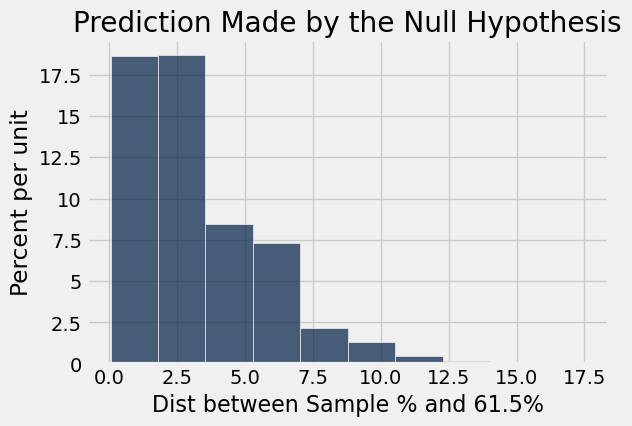

In [18]:
model_proportions = make_array(0.615, 0.385)
model_proportions_pos = model_proportions.item(0)
sample_size = 143

def one_simulated_distance():
    sample_proportion_pos = sample_proportions(143, model_proportions).item(0)
    return 100 * abs(sample_proportion_pos - model_proportions_pos)
    
repetitions = 10000
distances = make_array()

for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())


# This is the histogram of the distribution of the test statistic predicted by the null hypothesis.
Table().with_column(
    'Dist between Sample % and 61.5%', distances
).hist() # rmember that hist by default will bin it into 10 intervals
plots.title('Prediction Made by the Null Hypothesis');

Finally, let's see where our observed statistic falls on the histogram to draw our conclusions.

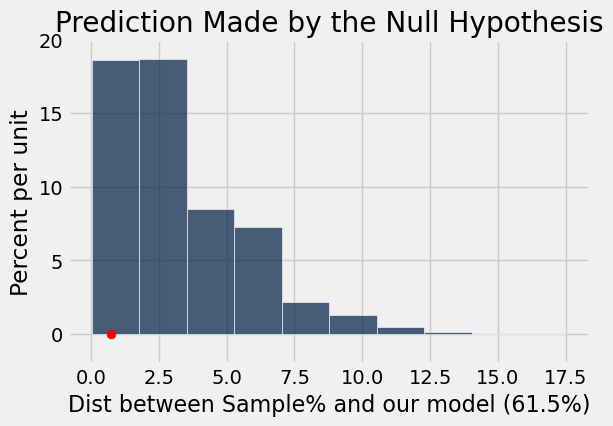

In [21]:
Table().with_column(
    'Dist between Sample% and our model (61.5%)', distances
).hist()
plots.ylim(-0.02, 0.2) # this is just to help you see the red dot (observed statistic) better
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

The observed statistic is like a typical distance predicted by the null hypothesis. Now, from a quick glance, it seems like the null hypothesis is our model (the red dot seems to be in the heart of the distribution). How do we conclude that the data are consistent with our model or in other words, our model looks good?

Hmmm...the answer is not as clear as it was with the die example. It depends on whether you think the red dot is too far from the bulk of the predicted values to be consistent with the prediction based on your model. But, thankfully enough we have a way to quantify if 'far' is too far. Enter ***p-value*** or *observed significance level* of a test!

The p-value of a test is the probability, assuming the null hypothesis (in this case, the 61.5% model) is true, of obtaining a test statistic as extreme as or more extreme than the observed statistic.

A small p-value means that such values are unlikely under the null hypothesis, suggesting the observed statistic deviates significantly from what the null predicts. This provides evidence that the data align more closely with the alternative hypothesis than with the null.

Go back to the die roll example now and look at the histogram to see if you can relate to these concepts!s!

In [49]:
%%ai openai-chat:gpt-3.5-turbo
ELI5 p-value in probability

```markdown
In probability, p-value is a measure that helps us determine the strength of the evidence against a null hypothesis. When conducting a hypothesis test, the p-value tells us the probability of observing the data we have or something more extreme if the null hypothesis is true.

A low p-value (typically less than 0.05) suggests that the observed data is unlikely to have occurred if the null hypothesis is true, therefore providing evidence against the null hypothesis. On the other hand, a high p-value indicates that the data is likely to occur even if the null hypothesis is true, suggesting that there is not enough evidence to reject the null hypothesis.
```

Common Misinterpretations:
❌ "p = 0.05 means there's a 5% chance the null hypothesis is true"
❌ "p = 0.05 means there's a 95% chance the alternative hypothesis is true"
✅ "If the null hypothesis were true, we'd see results this extreme about 5% of the time

Now that we know what the *p-value* is, let's calculate it for our problem.

The p-value quantifies how "far" the observed statistic is from the bulk of the null distribution, allowing you to make an objective decision! In other words, the p-value quantifies how surprising or unusual the observed data would be if the null hypothesis were true.

In [22]:
# this is the p-value for our problem!
# If the p-value is less than 5%, it is considered small and the result is called “statistically significant.”
# If the p-value is even smaller – less than 1% – the result is called “highly statistically significant.”
# Typically, along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.
np.count_nonzero(distances >= observed_statistic) / repetitions

0.8658

Under the null hypothesis, about 86.6% of simulated samples produced a test statistic as extreme as or more extreme than the observed value of 0.74.

Based on what we know now, if we consider the typical threshold of 0.05, that does seem like a big chance indicating that the observed data is reasonably likely to occur by chance alone or in other words, it supports our null hypothesis (that an American university has a 61.5% chance of having an overall score that is higher than the average of all the universities).

#### You can also think of it this way:
Under the null hypothesis, we assume that the null hypothesis provides an accurate model of the world. This means the observed data (or observed test statistic) should fit within the range of typical values predicted by the null. If the observed test statistic is very far from the values expected under the null (i.e., "extreme"), it suggests that the null may not be a good model for the data.

The p-value is the probability of obtaining a test statistic as extreme as (or more extreme than) the observed statistic if the null hypothesis were true. A small p-value indicates that the observed statistic is unusual under the null, leading us to question whether the null hypothesis is correct. A large p-value suggests the observed statistic is consistent with the null, so there's no reason to reject it. 

If the null hypothesis is true, extreme test statistics should rarely happen because they fall into the tails of the null distribution (low probability). When we observe such an extreme value, it casts doubt on the null hypothesis, because either the null hypothesis is wrong, OR something very unusual happened by chance.

#### Recall law of averages

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in case of a die, in the long run, the proportion of times the face with 6 appears gets closer and closer to 1/6.

Here “independently and under identical conditions” means that every repetition is performed in the same way regardless of the results of all the other repetitions.ons.

# A/B Testing

Now you will learn how to decide on whether two numerical samples come from the same underlying distribution!
#### What is A/B testing? 

A/B testing is a statistical method used to compare two groups (Group A and Group B) to determine if there is a significant difference between them. It's commonly used in decision-making, such as testing changes in website design, product features, or marketing strategies. Remember the examples we talked about for comparing different features or colors of buttons or descriptions on websites/apps!

In A/B testing, the goal is to evaluate whether the differences between two groups are due to a real effect (alternative hypothesis) or just random chance (null hypothesis).

#### How Does A/B Testing Work?

1) Formulate hypotheses just like before!

Null Hypothesis - The two groups come from the same underlying distribution and any observed differences are due to random chance.

Alternative Hypothesis - The two groups come from different distributions, meaning there is a real difference between them.

2) Then you collect your data! 

Gather numerical data from two groups (e.g., conversion rates, scores, or revenue). In our example below, its going to be means of the groups.

3) Then you compare the groups!

Compute a test statistic (e.g., the difference in means or medians) to summarize the difference between the groups.

4) And simulate under the null hypothesis and visualize the results!

Shuffle or resample the data to simulate what differences might look like if there were no true effect. This generates a null distribution. Plot the null distribution and locate the observed statistic (our red dot!). If the observed statistic is far from the bulk of the null distribution, it's evidence against the null hypothesis.

5) Time to make a decision!

Calculate the p-value - the probability of observing a difference as extreme as (or more extreme than) the observed difference, assuming the null hypothesis is true. Compare the p-value to a significance threshold (e.g., 0.05) to decide whether to reject the null hypothesis. See the section above for more on hypotheses testing, test statistic and p-value!

[Optional] Why Does A/B Testing Help Compare Two Distributions?
By simulating what random differences look like under the null hypothesis, A/B testing provides a way to determine if two samples differ meaningfully.
It helps identify if differences in sample means, medians, or other statistics are large enough to conclude they come from different distributions.
For example, imagine you want to see if a new website design (Group B) performs better than the old one (Group A) in terms of average time spent by 
users on the site!

#### Remember 
-> Compute observed difference (Example, calculate the difference in average time spent by users (or any other metrics suitable to your example) between the two groups)

-> Simulate null distribution (Example, shuffle the group labels repeatedly to simulate what differences might look like if the design change had no effect)

-> Plot results (Example, visualize the distribution of simulated differences and mark the observed difference)

-> Interpret/Conclude (Example, if the observed difference is far from the null distribution, you conclude the new design has a significant effect)

A/B testing is a useful technique for deciding whether two groups differ in a meaningful way. It combines hypothesis testing, simulation, and visualization to provide insights into whether observed differences are statistically significant or due to chance! 


In [136]:
%%ai openai-chat:gpt-3.5-turbo
Explain the A/B testing to a beginner in terms of deciding whether two numerical samples come from the same underlying distribution. 
Return your answer in markdown for better formatting.

A/B testing is a statistical method used to determine if two numerical samples come from the same underlying distribution. It involves comparing two groups (Group A and Group B) to see if there is a significant difference between them.

Here's how A/B testing works:

1. **Hypothesis**: First, we start with a null hypothesis (H0) that assumes there is no difference between the two groups. The alternative hypothesis (Ha) assumes that there is a significant difference.

2. **Randomization**: Next, we randomly assign individuals to either Group A or Group B. This randomization helps to ensure that any differences observed between the groups are due to the treatment and not other factors.

3. **Data Collection**: We collect data from both groups, usually measuring a specific variable of interest. For example, if we are testing the effectiveness of two different marketing strategies, we may measure the number of conversions for each strategy.

4. **Statistical Analysis**: Using statistical techniques, we analyze the collected data to determine if there is a significant difference between the two groups. Commonly used statistical tests include t-tests, chi-square tests, or ANOVA (analysis of variance).

5. **Interpretation**: Based on the statistical analysis, we either reject or fail to reject the null hypothesis. If we reject the null hypothesis, it means there is evidence to suggest that the two groups come from different distributions. If we fail to reject the null hypothesis, it means there is not enough evidence to conclude a significant difference between the groups.

A/B testing helps in making data-driven decisions by providing evidence of whether two numerical samples come from the same underlying distribution. By comparing the groups and analyzing the results, we can determine which option performs better and make informed decisions based on the data.

To put that into perspective, you will conduct a new study. You aim to see whether the *research quality score* of all the universities is associated with their *overall score* being higher or lower than the average. 

For that, let’s first look at the distribution of the research quality scores of the universities that have overall scores that are higher than the average compared to the universities that have overall scores that are below the average.

In [72]:
average_score = np.average(university_rankings.column('Overall scores'))

# Filtering universities with scores higher than the average
higher_than_average = university_rankings\
                          .where('Overall scores', are.above(average_score))

# Counting the number of universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of non-American universities that don't meet the condition
num_lower_than_average = university_rankings.num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])
result_table

Condition,Count
Higher than Average,429
Lower than Average,481


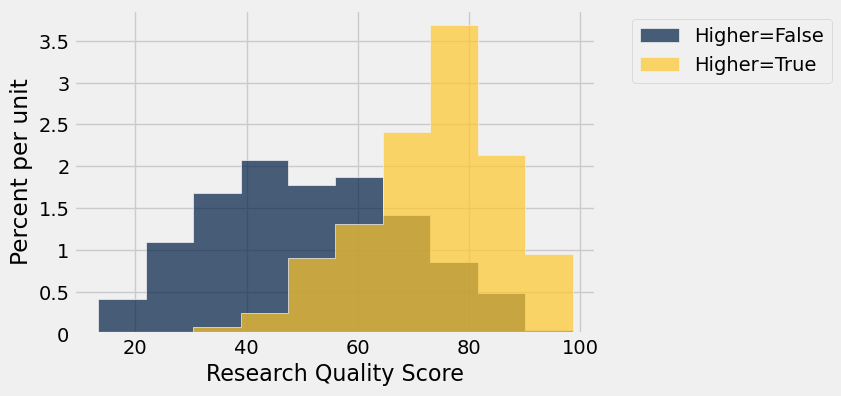

In [73]:
def check_average(val):
    if val>np.average(university_rankings.column('Overall scores')):
        return True
    else:
        return False


university_subset = university_rankings\
.with_column("Higher",university_rankings.apply(check_average,"Overall scores"))

university_subset.group("Higher")
university_subset.hist('Research Quality Score', group = 'Higher')

You can observe that even though there is some distance between the averages of the two distributions, there is a significant amount of overlap happening between the histograms. This raises the question of whether the difference reflects just chance or a difference in the distributions in the larger population of universities.

Alright. It's time for another test hypothesis! Let's repeat the problem statement - 
#### What do we want to know? 
We want to know if universities with overall scores above average tend to have higher research quality scores than those with below-average scores. This is the alternative hypothesis. The null hypothesis states there is no relationship between these scores.

Again, define your *null* and *alternative* hypotheses. As a *null* hypothesis you can assume that the two distributions are identical but the differences that we observed on the graph above are attributed to chance. As an *alternative* hypothesis you can assume that among all the universities, the ones that have an overall score above the average, have a higher research quality score while the ones that have an overall score below the average, have a lower research quality score.

What's next? Of course, you need to define your test statistic. It would be reasonable for you to use the difference between the two group means as your statistic, right? Yes and that is because the alternative hypothesis compares the averages of the research quality score for the two groups of universities.

In [74]:
ave1=np.average(university_rankings.where('Overall scores', are.above(average_score)).column('Research Quality Score'))
ave2=np.average(university_rankings.where('Overall scores', are.below(average_score)).column('Research Quality Score'))
result_table = result_table.with_columns([
    'Average', [ave1, ave2]
])
result_table

Condition,Count,Average
Higher than Average,429,73.6242
Lower than Average,481,50.9807


In [76]:
means = result_table.column(2)
observed_difference = means.item(1) - means.item(0)
observed_difference

-22.643577143577147

#### Time to simulate! 
To test the null hypothesis, we will simulate (say, 5000 - this can be 10000 or 20000 or a big enough number you choose) random differences in group means. These values represent what we'd expect if there were no real relationship between overall score and research quality score. This is called the null distribution.

How do we do that? We don't have any probability arrays here! Thankfully enough we have tests that are based on random permutations of the data and are called *permutation tests*. Permutation tests allow us to "shuffle" or "permute" the data labels (a column of interest) to generate a distribution of differences that would occur under the null hypothesis. In other words, we are going to randomly re-assign values in a column!

In [173]:
%%ai openai-chat:gpt-3.5-turbo
Explain the random permutation test to a beginner. Return your answer in markdown for better formatting.

The random permutation test is a statistical method used to assess the significance of an observed result by comparing it to a distribution of randomly permuted data. Here is how it works:

1. Start with a dataset containing your observed measurements or values.

2. Identify the specific statistic or measure that you want to test. It could be a mean, median, correlation coefficient, or any other relevant measure.

3. Randomly shuffle (permute) the values of your dataset, while keeping the associations between variables intact. For example, if you have two variables X and Y, make sure that the X and Y values remain paired in the permuted dataset.

4. Calculate the statistic of interest (e.g., mean, median) using the permuted dataset.

5. Repeat steps 3 and 4 a large number of times (e.g., 1000) to create a distribution of statistics generated from randomly permuted data.

6. Compare the observed statistic (from step 2) with the distribution of permuted statistics. Determine the proportion of permuted statistics that are more extreme than the observed statistic.

7. This proportion represents the p-value, which tells you the likelihood of obtaining a statistic as extreme as the observed one by chance alone. A smaller p-value indicates stronger evidence against the null hypothesis (i.e., that there is no significant effect or relationship).

By using random permutations, the test allows you to generate a null distribution under the assumption of no effect, enabling you to assess the significance of your observed result in a robust and unbiased manner.

An implementation will help.

First you are going to need a function that computes the difference between the means.



In [79]:
def difference_of_means(table, group_label):
    reduced = table.select('Research Quality Score', group_label)

    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

For convenience, let's keep only three columns of the original table.

In [80]:
university_reduced = university_rankings.with_column("Higher",university_rankings.apply(check_average,"Overall scores")).select("ranking-institution-title",'Higher','Research Quality Score')
university_reduced

ranking-institution-title,Higher,Research Quality Score
Massachusetts Institute of Technology,True,92.2
Stanford University,True,91.9
University of Oxford,True,81.7
"University of California, Berkeley",True,95.2
Peking University,True,74.5
Tsinghua University,True,82.5
University of Cambridge,True,86.6
ETH Zurich,True,87.1
Harvard University,True,95.2
National University of Singapore,True,79.7


Now let's shuffle!

In [81]:
shuffled_labels = university_reduced.sample(with_replacement = False).column(1)
original_and_shuffled = university_reduced.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled

ranking-institution-title,Higher,Research Quality Score,Shuffled Label
Massachusetts Institute of Technology,True,92.2,False
Stanford University,True,91.9,True
University of Oxford,True,81.7,False
"University of California, Berkeley",True,95.2,True
Peking University,True,74.5,False
Tsinghua University,True,82.5,False
University of Cambridge,True,86.6,False
ETH Zurich,True,87.1,False
Harvard University,True,95.2,True
National University of Singapore,True,79.7,False


Now you need to calcualte the distance between the averages of the suffled groups. So let's put your `difference_of_means` function into use. Eventually, you will need to compare that with the original groups.

In [82]:
shuffled_only = original_and_shuffled.select('Research Quality Score','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means
difference_of_means(original_and_shuffled, 'Shuffled Label')

-0.23332073332073122

Now for your convenience let's put everything under a single function!

In [83]:
def one_simulated_difference_of_means():
    # array of shuffled labels
    shuffled_labels = university_reduced.sample(with_replacement=False).column('Higher')
    
    # table of original and shuffled labels
    shuffled_table = university_reduced.select('Research Quality Score').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

one_simulated_difference_of_means()

0.9238644238644298

It is now time to run some permutation test! For that you will need a `for` loop to be able to execute the function you built above multiple times.

In [84]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference) 

Finally, to draw any meaningfull conclusions, you will need to plot the histogramm that shows the distribution of these 5,000 values. By now you should know how. 

Make sure you don't forget to plot the observed statistic as well!

Observed Difference: -22.643577143577147


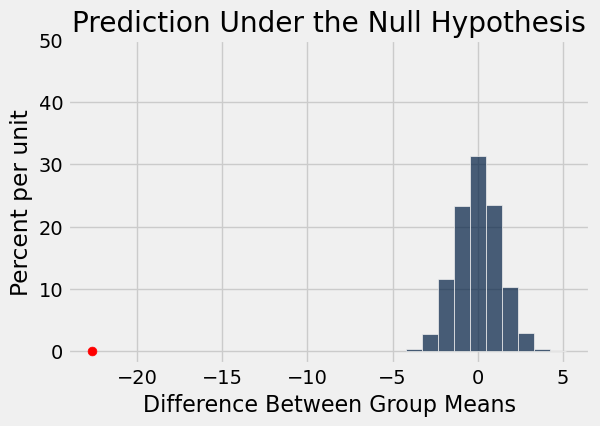

In [85]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.ylim(-0.02, 0.5)
plots.scatter(observed_difference, 0, color='red', s=40);

You could calculate the *p-value* but let's be honest, the observed difference is so far from the mean that we could safely conclude to the fact that based on the test results data favor the alternative over the null hypothesis (you can assume that among all the universities, the ones that have an overall score above the average, have a higher research quality score while the ones that have an overall score below the average, have a lower research quality score).